# ROC curve

In [2]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap

In [6]:
df=pd.read_csv('breast_cancer.csv')

In [7]:
df.head(3)

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnose
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0


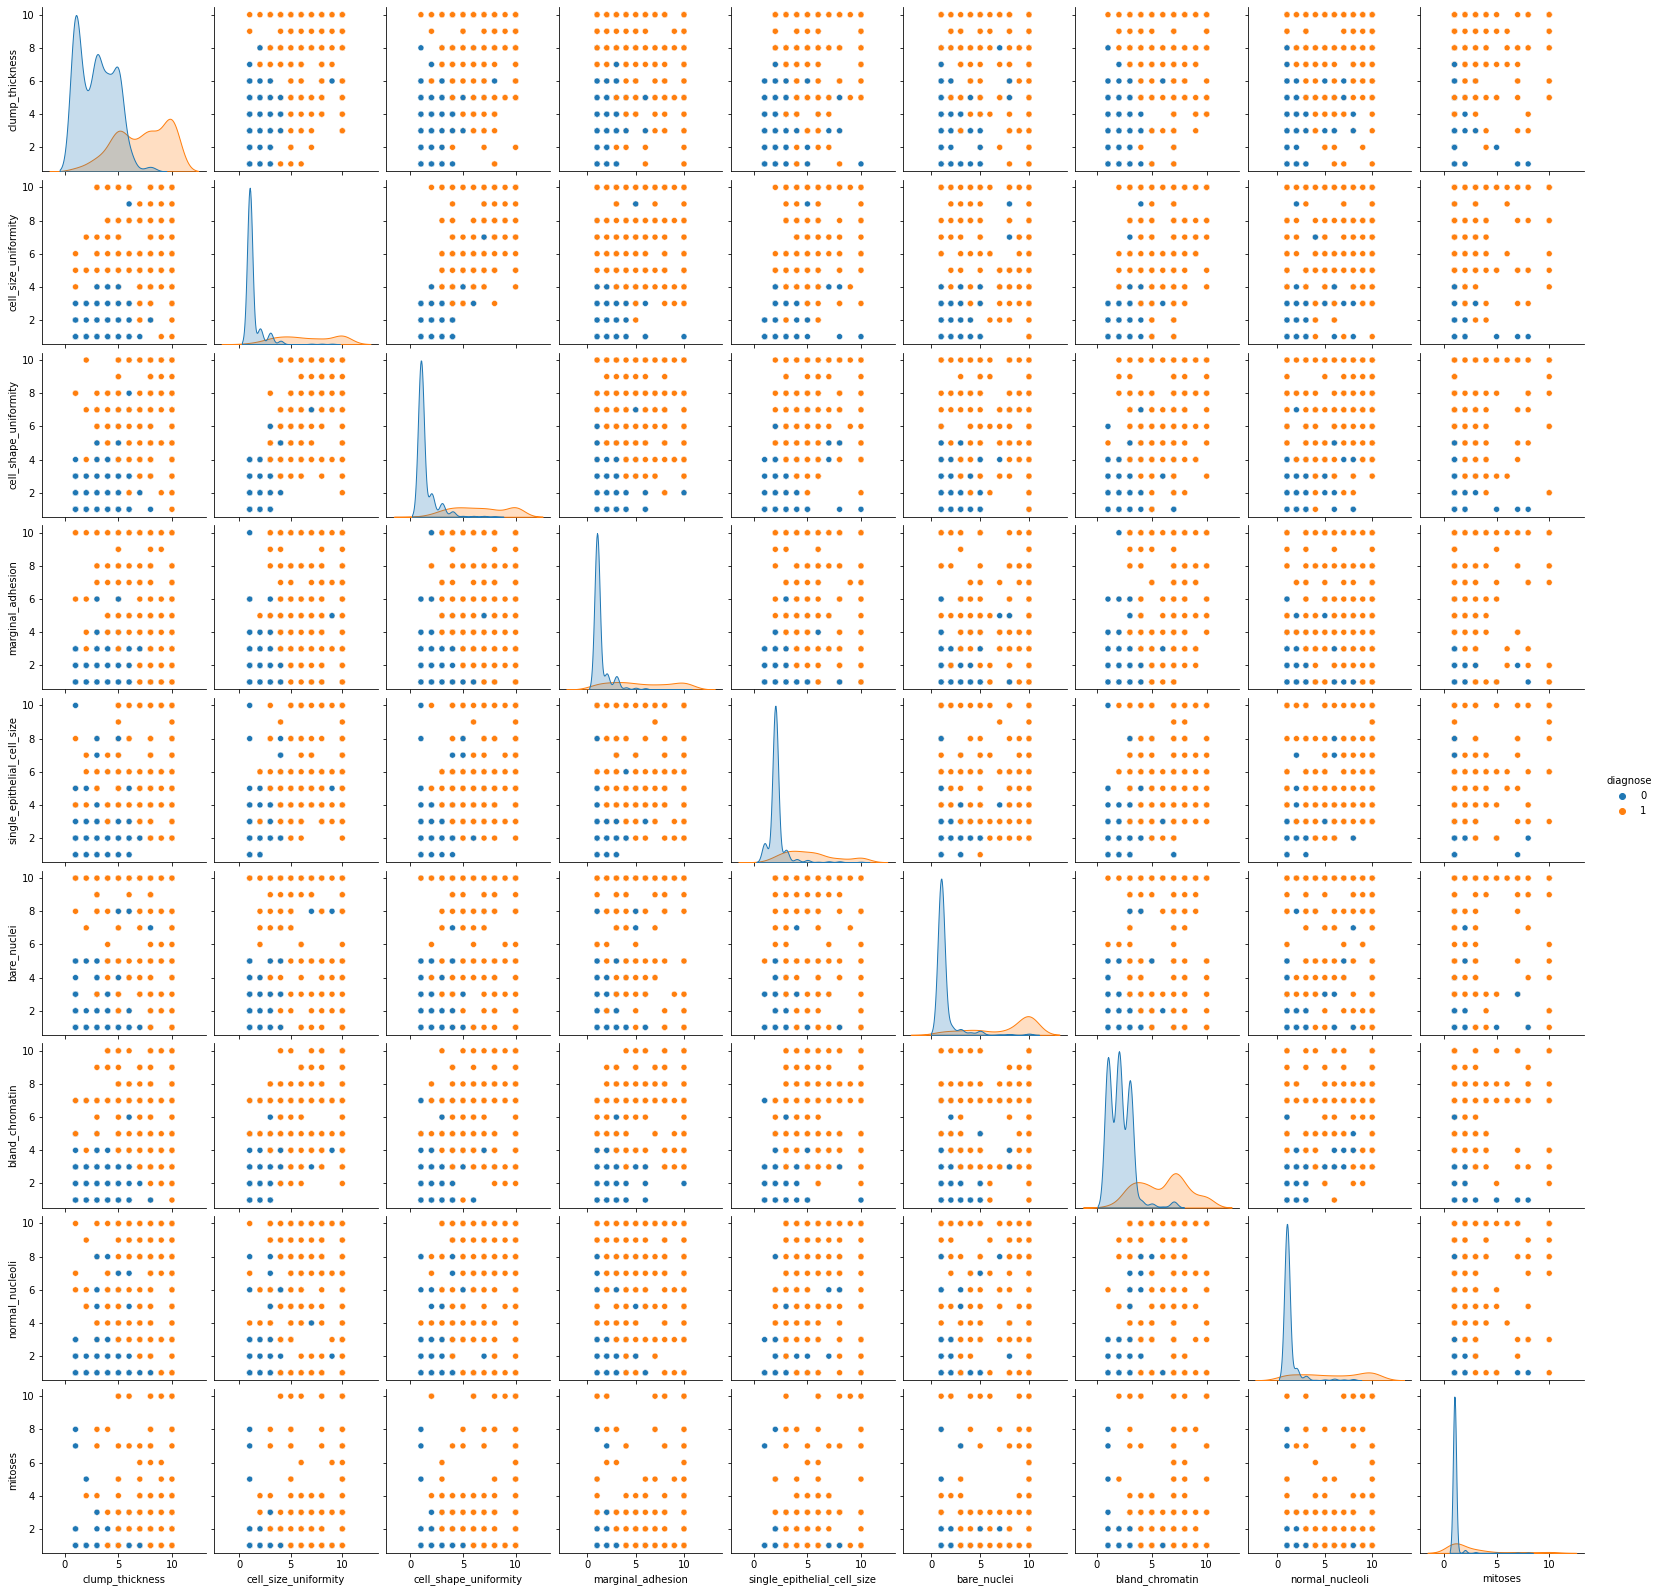

In [8]:
sns.pairplot(df, hue='diagnose');   # pairplot of dataset, scatter plot which represents the relationship between
                                   # each pair of features 

In [9]:
X=df.drop('diagnose', axis=1)
y=df['diagnose']

In [10]:
# split data into testing and training 

Xtrain, Xtest, ytrain, ytest=train_test_split(X,y, test_size=0.3, random_state=0)

In [11]:
# Standardaize data 

scaler=StandardScaler()
scaler.fit(Xtrain)
Xtrain=scaler.transform(Xtrain)
Xtest=scaler.transform(Xtest)

In [50]:
# define all models

model1 = LogisticRegression(random_state=1,solver='newton-cg',multi_class='multinomial')
model2 = RandomForestClassifier(random_state=1, n_estimators=2000)
model3 = GaussianNB()
model4 = KNeighborsClassifier(n_neighbors=5)

In [51]:
# fit the model

model1.fit(Xtrain, ytrain)
model2.fit(Xtrain, ytrain)
model3.fit(Xtrain, ytrain)
model4.fit(Xtrain, ytrain);

In [52]:
# predict class (y) for testing data (Xtest)

ypred1=model1.predict(Xtest)
ypred2=model2.predict(Xtest)
ypred3=model3.predict(Xtest)
ypred4=model4.predict(Xtest)

In [53]:
ypred6;

In [54]:
print("Accuracy of Logistic Regression is: ", model1.score(Xtrain, ytrain))
print("Accuracy of Random Forest is: ", model2.score(Xtrain, ytrain))
print("Accuracy of Gaussaian NB is: ", model3.score(Xtrain, ytrain))
print("Accuracy of KNN is: ", model6.score(Xtrain, ytrain))

Accuracy of Logistic Regression is:  0.9769874476987448
Accuracy of Random Forest is:  1.0
Accuracy of Gaussaian NB is:  0.9707112970711297
Accuracy of KNN is:  0.9790794979079498


In [56]:
# calculate confusion matrix

cm1=confusion_matrix(ypred1, ytest)
cm2=confusion_matrix(ypred2, ytest)
cm3=confusion_matrix(ypred3, ytest)
cm4=confusion_matrix(ypred4, ytest)

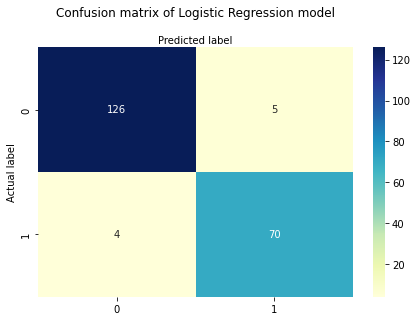

In [57]:
# plot confusion matrix

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(cm1, annot=True, cmap="YlGnBu" ,fmt='g')   # cm1 is the confusion matrix for first model (Logistic Regression)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Logistic Regression model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');


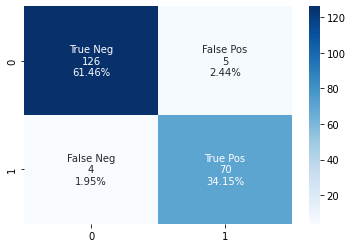

In [58]:
# Confusion matrix for model 1 ---- cm1 is the confusion matrix for model 1 (Logistic Regression)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues'); 

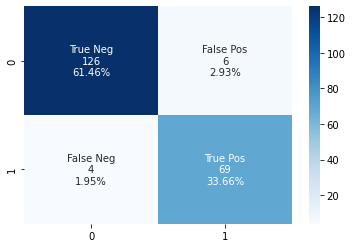

In [59]:
# confusion matrix for model 2 (Random Forest)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm2, annot=labels, fmt='', cmap='Blues'); 

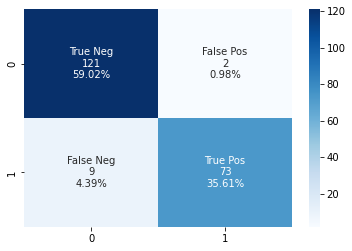

In [46]:
# confusion matrix for model 3 (NB)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm3.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm3.flatten()/np.sum(cm3)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm3, annot=labels, fmt='', cmap='Blues'); 

In [60]:
print(classification_report(ypred1, ytest))  # first model (logistic Regression)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       131
           1       0.93      0.95      0.94        74

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predicti

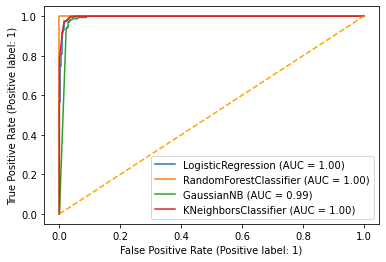

In [61]:
### plot ROC curve for Xtrain and ytrain

disp=plot_roc_curve(model1, Xtrain, ytrain)
plot_roc_curve(model2, Xtrain, ytrain, ax=disp.ax_)
plot_roc_curve(model3, Xtrain, ytrain, ax=disp.ax_)
plot_roc_curve(model4, Xtrain, ytrain, ax=disp.ax_)
plt.plot([0,1], [0,1], color='orange', linestyle='--');

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predicti

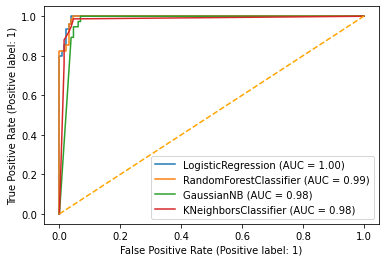

In [62]:
### Plot ROC Curve for Xtest, ytest

disp=plot_roc_curve(model1, Xtest, ytest)
plot_roc_curve(model2, Xtest, ytest, ax=disp.ax_)
plot_roc_curve(model3, Xtest, ytest, ax=disp.ax_)
plot_roc_curve(model4, Xtest, ytest, ax=disp.ax_)
plt.plot([0,1], [0,1], color='orange', linestyle='--');

# Feature importance using Random Forest

In [64]:
rf=RandomForestClassifier(random_state=1, n_estimators=100)

In [65]:
rf.fit(X,y)

RandomForestClassifier(random_state=1)

In [66]:
I=rf.feature_importances_

In [67]:
I

array([0.05398005, 0.2516356 , 0.2464734 , 0.02746694, 0.10317641,
       0.13508699, 0.11311992, 0.06109489, 0.00796582])

In [68]:
X[0:2]

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1


In [69]:
df2=pd.DataFrame({
    "Importance": [0.05398005, 0.2516356 , 0.2464734 , 0.02746694, 0.10317641,
       0.13508699, 0.11311992, 0.06109489, 0.00796582],
    "diagnose": ["clump_thickness", "cell_size_uniformity", "cell_shape_uniformity", "marginal_adhesion", "single_epithelial_cell_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli",
                "mitoses"] })

In [70]:
df2

,Importance,diagnose
0,0.053980,clump_thickness
1,0.251636,cell_size_uniformity
2,0.246473,cell_shape_uniformity
3,0.027467,marginal_adhesion
4,0.103176,single_epithelial_cell_size
5,0.135087,bare_nuclei
6,0.113120,bland_chromatin
7,0.061095,normal_nucleoli
8,0.007966,mitoses


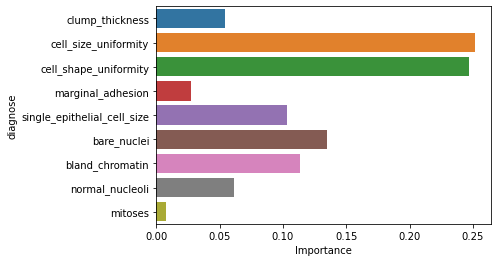

In [71]:
sns.barplot(data=df2, y="diagnose", x="Importance");